<a href="https://colab.research.google.com/github/aditi2259/Hands-on-Workshop-AIML/blob/main/AIML_Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


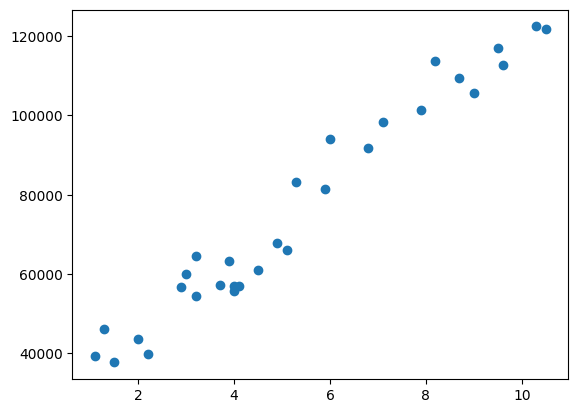

In [ ]:
plt.scatter(data['YearsExperience'],data['Salary']) #x and y are the different data parameters

Extract the input and output features

In [ ]:
X= data[['YearsExperience']] #feature extraction  #input must be 2 dim
Y= data['Salary']

In [ ]:
print(X)
print(Y)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25   

In [ ]:
#split the data into train set and test set
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#import the model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#Evaluate the model
pred = lr.predict(xtest)

In [ ]:
pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [ ]:
pd.DataFrame({'Actual prediction':ytest, 'Model prediction': pred})

,Actual prediction,Model prediction
27,112635.0,115573.622884
15,67938.0,71679.938782
23,113812.0,102498.908470
17,83088.0,75415.571471
8,64445.0,55803.499851
9,57189.0,60473.040713
28,122391.0,122110.980090
24,109431.0,107168.449332
12,56957.0,63274.765230


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(ytest,pred)

37784662.46621314

In [ ]:
mean_absolute_error(ytest,pred)

5161.328710400183

In [ ]:
#random_prediction
lr.predict([[25]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([259395.48143027])

In [ ]:
#linear regression formula y=mx+c
print("m value=", lr.coef_)
print("c value=", lr.intercept_)
print("Salary when X=25:", lr.coef_*25+lr.intercept_)

m value= [9339.08172382]
c value= 25918.438334893202
Salary when X=25: [259395.48143027]


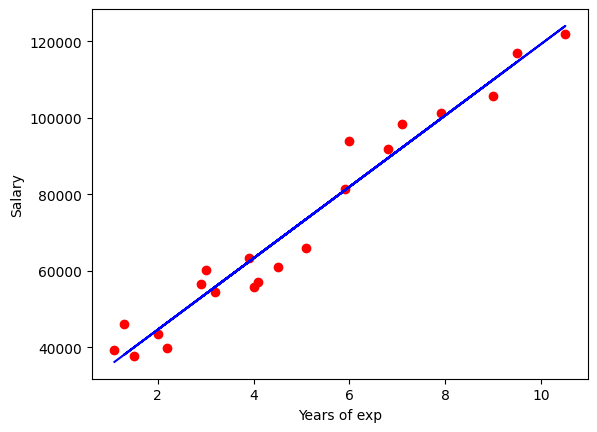

In [ ]:
#regression line fitted for the model
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lr.predict(xtrain),color='blue')
plt.xlabel('Years of exp')
plt.ylabel("Salary")
plt.show()

Multivariable Linear Regression

In [ ]:
data=pd.read_csv('/content/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


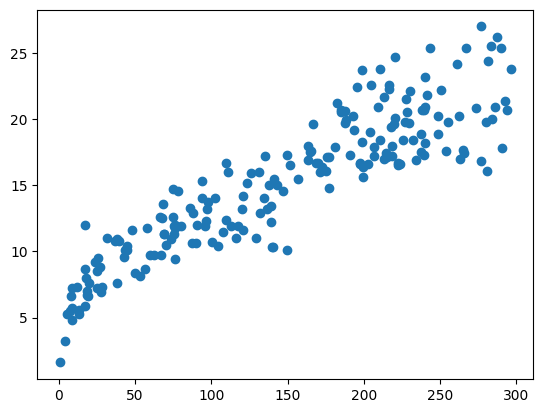

In [ ]:
plt.scatter(data['TV'],data['Sales'])

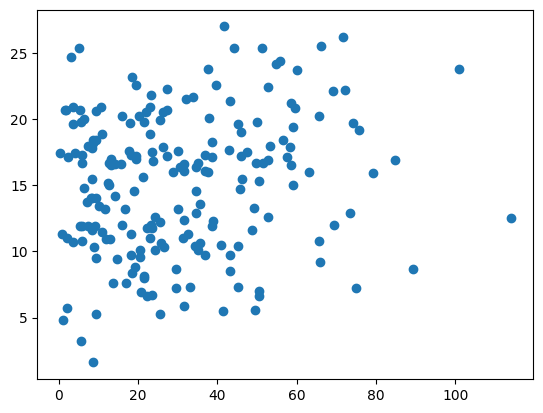

In [ ]:
plt.scatter(data['Newspaper'],data['Sales'])

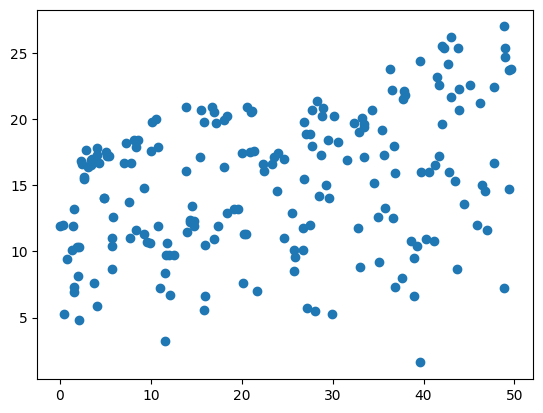

In [ ]:
plt.scatter(data['Radio'],data['Sales'])

In [ ]:
#extract input and output features
X= data[['TV','Newspaper','Radio']]
Y= data['Sales']

In [ ]:
#split the data
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#create and fit the model
lr_multi = LinearRegression()
lr_multi.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#evaluate the model
pred=lr_multi.predict(xtest)
print("mse=", mean_squared_error(ytest,pred))
print("mae=", mean_squared_error(ytest,pred))

mse= 2.541624036229147
mae= 2.541624036229147


In [ ]:
print("prediction for user inputs:",lr_multi.predict([[10,20,30]]))

prediction for user inputs: [8.51949]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#now the formula will be y=m1x1+m2x2+m2x3+c
print("M values:",lr_multi.coef_)
print("C values:",lr_multi.intercept_)

M values: [0.05358869 0.00793167 0.10270677]
C values: 4.743766701589683


In [ ]:
task_data=pd.read_csv('/content/real_estate_price_size.csv')
task_data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


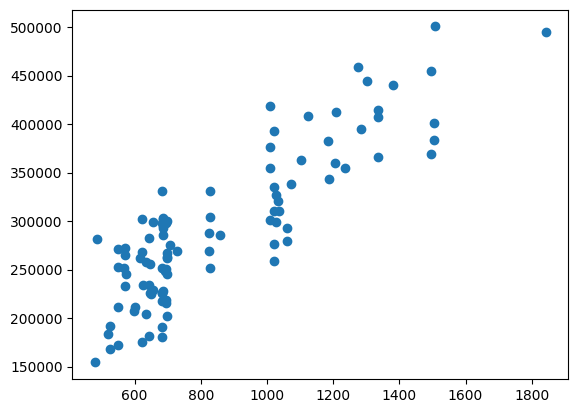

In [ ]:
plt.scatter(task_data['size'],task_data['price'])

In [ ]:
X= task_data[['size']]
Y= task_data['price']

In [ ]:
print(X)
print(Y)

       size
0    643.09
1    656.22
2    487.29
3   1504.75
4   1275.46
..      ...
95   549.80
96  1037.44
97  1504.75
98   648.29
99   705.29

[100 rows x 1 columns]
0     234314.144
1     228581.528
2     281626.336
3     401255.608
4     458674.256
         ...    
95    252460.400
96    310522.592
97    383635.568
98    225145.248
99    274922.856
Name: price, Length: 100, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#import the model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#Evaluate the model
pred = lr.predict(xtest)

In [ ]:
pred

array([250018.14481292, 267827.22367895, 329592.94867169, 261612.21431882,
       337660.48870287, 261612.21431882, 368554.90326125, 257995.36872295,
       337660.48870287, 250018.14481292, 257995.36872295, 327152.3130257 ,
       230423.74727297, 225384.94786271, 260820.37297756, 382839.55302748,
       363516.10385098, 395156.15150258, 260820.37297756, 257995.36872295,
       431858.10268846, 241316.29155877, 234853.43795919, 287850.09770064,
       429236.83480017, 404738.06184423, 329592.94867169, 332846.42940803,
       260820.37297756, 252775.93707039])

In [ ]:
pd.DataFrame({'Actual prediction':ytest, 'Model prediction': pred})

,Actual prediction,Model prediction
83,282683.544,250018.144813
53,269523.056,267827.223679
70,276875.632,329592.948672
45,300061.480,261612.214319
44,293044.496,337660.488703
39,245747.200,261612.214319
22,412569.472,368554.903261
80,180307.216,257995.368723
10,279555.096,337660.488703
0,234314.144,250018.144813


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(ytest,pred)

1539723864.8697789

In [ ]:
mean_absolute_error(ytest,pred)

34336.874666698786

In [ ]:
#random_prediction
lr.predict([[487.29]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([217294.30370751])

In [ ]:
#linear regression formula y=mx+c
print("m value=", lr.coef_)
print("c value=", lr.intercept_)
print("price when X=487.29:", lr.coef_*487.29+lr.intercept_)

m value= [210.03749105]
c value= 114945.13469431744
price when X=487.29: [217294.30370751]


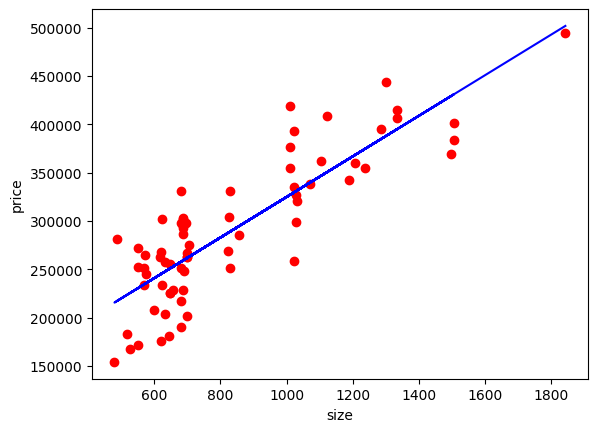

In [ ]:
#regression line fitted for the model
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lr.predict(xtrain),color='blue')
plt.xlabel('size')
plt.ylabel("price")
plt.show()

Logistic Regression


In [ ]:
data = pd.read_csv('/content/bank-full.csv')
data.shape

(45211, 17)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#find out the categorical columns
data_cat=data.select_dtypes(object) #select only the object columns
data_num = data.select_dtypes('int64') #select only the int64 datatype column

In [ ]:
data_cat['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
#Encode the categorical values to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data_cat:
  data_cat[col]=le.fit_transform(data_cat[col])

In [ ]:
data_cat['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [ ]:
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1
45207,5,0,0,0,0,0,0,9,3,1
45208,5,1,1,0,0,0,0,9,2,1
45209,1,1,1,0,0,0,1,9,3,0


In [ ]:
data_new=pd.concat([data_num,data_cat],axis=1)

In [ ]:
data_new.dtypes

,0
age,int64
balance,int64
day,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
job,int64
marital,int64
education,int64


In [ ]:
data_new.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
#extract the input and output features
X= data_new.drop(['Target'],axis=1)
Y= data_new['Target'] #Y will have output features

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [ ]:
#create on logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log.score(xtest,ytest)

0.8863904452963728

In [ ]:
from sklearn.metrics import accuracy_score
pred = log.predict(xtest)
accuracy_score(ytest,pred)

0.8863904452963728

Task


In [ ]:
task_data = pd.read_csv('/content/diabetes.csv')
task_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

data_cat=data.select_dtypes(object)
data_num = data.select_dtypes('int64')

In [ ]:
data_cat['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

K nearest neighbhors


In [ ]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
data_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data_new=pd.DataFrame(data=data_cancer.data,columns=data_cancer.feature_names)
data_new['Target']=data_cancer.target
data_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#select two features for the model
X= data_new[['mean radius','mean texture']]
Y= data_new['Target']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)


KNeighborsClassifier()

In [ ]:
knn.score(xtest,ytest)

0.8771929824561403

In [ ]:
from sklearn.metrics import accuracy_score
pred=knn.predict(xtest)
accuracy_score(ytest,pred)

0.8771929824561403